In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

First and foremost, you should have already installed ParaView on your machine. If not, you can [download the package](https://www.paraview.org/download/) from [paraview.org](https://www.paraview.org).

# An Introduction to ParaView

**version 0.1**

***

Adam A Miller (Northwestern CIERA/Adler Planetarium)
01 May 2018

Our data do not live in 2 dimensions... 

[As the third grade version of me would say, *"Ummmm, Mr. Miller? Duh!"*]

And yet, a fundamental limitation we that consisently place upon ourselves is to insist that we represent the data in 2D when communicating with the public and our colleagues. 

In a sense, we are doing science with 1 arm tied behind our backs...

Our data also do not live in 3 dimensions.

But I can think of a distinct advantage to moving to 3D representations: our spatial representation of the Universe can be fully described in 3 dimensions. 

Thus, if we want to describe the positions of stars in a cluster (*Gaia*?), or show variations in density within a Giant Molecular Cloud, or examine the surface of a minor planet or asteroid, these tasks are all acomplished much better in 3D.

(ignoring special relativity for now...)

Why interactive?

It would not be unreasonable to take the following stance: the heavy lifting in exploring a data set should be done by the researchers. In this sense, "final" plots or renditions can be presented to an audience via a slide or paper that summarize all of the salient features.

What if, however, you wish to enable science, or discovery, for amatuers (e.g., the [Zooniverse](https://www.zooniverse.org/), or even in the classroom (see James's talk from yesterday)? 

It is unfair to ask this audience to calculate integrals, or to develop even a small fraction of the domain expertise that you and your colleagues (PhDs and PhD candidates) have. Interactivity provides a natural way for this audience to explore the data.

Furthermore, it may even *help you* in your quest for discovery and understaning.

So, today –– [ParaView](https://www.paraview.org/)

ParaView is an open source platform that was specifically designed for data analysis and visualization. Briefly, ParaView is interesting (for us) for several reasons: 

  1. General purpose and can easily be used on laptop or HPC
  2. Naturally utilizes multiple processors for handling large data sets (in particular 3D)
  3. Includes a scripting interface (via Python)

Ultimately, we want to turn data (images, measurements, spectra, etc) into some rendering to represent the data in a way that provides insight or better understanding [for all viz, not just ParaView].

ParaView takes VTK, the Visualization Toolkit, data as an input (later you will create some VTK files).

VTK uses a basic data-flow paradigm, in which data flows through the system while being transformed at each step [via modules known as algorithms]. Algorithms have input ports to take data, and output ports to produce output:

  * Sources do not have input ports, but have outputs [i.e. to get data into the system, e.g., reading a file]
  * Sinks convert input into graphics such that they can be rendered 
  * Filters are intermediate algorithms, that convert input into output

Connecting sources, sinks, and filters can create arbitrarily complicated visual renderings. 

<img style="display: block; margin-left: auto; margin-right: auto" src="./images/pv_visualization_model.png" align="middle">

<div align="right"> <font size="-3">(credit: ParaView Guide) </font></div>

Following this brief introduction, we will start the visual exploration with ParaView. 

## Problem 1) Creating an Interactive Sphere

We will begin by creating a simple 3D object (a sphere). While there is nothing spectacular about a sphere, I'll note that it is not particularly easy to represent a(n interactive) sphere in `matplotlib`.

**Problem 1a**

Open paraview. 

Create a sphere. [*Sources $\rightarrow$ Sphere*]

At this stage you will notice that nothing is yet visible in the layout panel. However, a few things have happened.

There is now a pipeline module in the pipeline browser (upper left panel). Properties of the sphere can be adjusted in the properties panel (lower left). Finally, the *Apply* button in the properties panel is now active.

While this is not the case for this particular data set, because data ingestion and manipulation can be highly time consuming, ParaView allows you to perform those operations prior to rendering the data. 

The *Apply* button allows you to accept those changes before proceeding. 

**Problem 1b**

Render the sphere [click *Apply*].

Use your mouse to inspect, rotate, and examine the sphere.

**Problem 1c**

Adjust the center of the sphere to the position [0,0,1], and adjust the radius to 1. 

**Problem 1d**

Make the sphere appear more "spherical" by adjusting theta resolution to 100. 

There are a variety of filters that can be applied to the data (in the *Filters* menu). The available filters are dependent on the data type provided to ParaView.

**Problem 1e**

Shrink the size of the mesh cells on the surface of the sphere. [*Filters* $\rightarrow$ *Alphabetical*  $\rightarrow$ *Shrink*]

Can you see the shrunken mesh cells?

## Problem 2) Python Scripting a Sphere

ParaView provides a python scripting interface. The package, `pvpython`, makes it possible to script up everything that one might want to do with paraview, using `python` (!). 

The ability to script these tasks is hugely important for reproducibility (and more advanced versions of automated analysis). 

Unfortunately, (as far as I can tell) `pvpython` is only compatible with `python` version 2.x, and it will not run within our DSFP conda environment. Forunately, ParaView ships with an internal `python` interpreter, so we are going to use that for now.

**Problem 2a**

Open the `python` interpreter. [*View $\rightarrow$ Python Shell*]

This will open a `python` (likely v2.7.10) instance just below the layout panel.

Unfortunately, at this stage there are many panels, and not a lot of room to inspect the visualization. Ideally a lot of this work would be done on larger screens, but we will for now work with what we have.

[If space is really at a premium on your screen, you can remove the pipeline browser and properties window as everything will be scripted for the remainder of this problem.]

Before we proceed - remove the previously created sphere from the layout panel. [Click on Shrink, then click the *delete* button in the properties tab. Click on Sphere1, then click the *delete* button in the properties tab.]

**Problem 2b**

Create the sphere data source using the `python` interpreter.

    Sphere()

As before, we have created an active source in the pipeline. However, the sphere has not been rendered.

**Problem 2c**

Show the active source. 

    Show()      # prepare the display
    Render()    # render the visualization

**Problem 2d**

Adjust the properties of the sphere to match those in **Problem 1**.

    SetProperties(radius=1.0)
    SetProperties(Center=[0,0,1])

In addition to `SetProperties` for the data, you can also use `SetDisplayProperties` to adjust the geometric represenation of the data.

**Problem 2e**

Set the opacity of the sphere to 0.2.

    SetDisplayProperties(0.2)

As before, we can also create filters via `pvpython`. Again, we will shrink the size of the mesh cells on the sphere.

**Problem 2f**

Shrink the mesh cells on the surface of the sphere (using only python commands).

    Shrink()

*Hint* - don't forget to render the object.

Does this look like the rendering that we created previously?

When scripting ParaView, the input data set is not automatically hidden after creating a new output. Instead, these actions must be done explicitly. There are a few different ways to handle this (below is an example that leverages an object oriented approach – meaning you need to start over to follow this).

**Problem 2g**

Using python remove the sphere instance from the rendition of the sphere.

    sphereInstance = Sphere()
    sphereInstance.Radius = 1.0
    sphereInstance.Center[2] = 1.0
    print sphereInstance.Center

    sphereDisplay = Show(sphereInstance) 
    view = Render () 
    sphereDisplay.Opacity = 0.7

    Render(view)

    shrinkInstance = Shrink(Input=sphereInstance , ShrinkFactor=1.0)
    print shrinkInstance.ShrinkFactor
    Hide(sphereInstance)
    shrinkDisplay = Show(shrinkInstance) 
    Render()

## Problem 3) Scripting An Interactive Sphere

Finally, it is possible to capture the commands executed via the GUI as a python script. In this way it is easy to reproduce an interactive session.

**Problem 3a**

Trace your interactive commands [*Tools $\rightarrow$ Start Trace*]

**Problem 3b**

Recrete a sphere following the steps from **Problem 1**.

How does your trace compare to the script that you developed in **Problem 2**?

**Break Out Problem**

Of the 3 modes covered in Problems 1, 2, and 3 - which is to be preferred?

[*spend a few minutes discussing with your neighbor*]

## Problem 4) Getting Data Into ParaView

Spheres are all well and good, but what we truly care about is visualizing our astronomical data.

Unfortunately, this is not as simple as `plot(x,y)` or even `plot(x,y,z)` as you might expect for something designed to play nicely with `python`.

Instead, we need to package the data as [Visualization Toolkit](https://www.vtk.org), or vtk, files.

Even more unfortunately, vtk are binary files that are known to be somewhat challenging to work with.

Nevertheless, many of the most common/powerful 3D rendering programs (ParaView, Mayavi, etc), utilize vtk data.

If I am being completely honest – and I always try to be completely honest – I don't know a lot about vtk, or why it's an especially useful format for these programs. 

Nevertheless, I will try to provide you with some insight (i.e. repeat what other people have said) on the vtk format.

Briefly, the vtk representation of data requires the specification of a geometry or topology, and then the data set properties are specified within the chosen geometry. vtk can handle points or cells data in five different formats: structured points, structured grid, rectilinear grid, unstructured grid, and polygonal data.

Structured points is the most simple format, wherein only the mesh dimensions (nx, ny, nz), mesh origin (x0, y0, z0), and cell dimensions (dx, dy, dz) are specified.

<img style="display: block; margin-left: auto; margin-right: auto" src="./images/Structured_points.png" align="middle">

<div align="right"> <font size="-3">(credit: https://www.vtk.org/Wiki/VTK/Writing_VTK_files_using_python) </font></div>

Rectilinear grid is also regularly spaced, but the spacing is not uniform. Thus, nodes must be specified along the given axes Ox, Oy, and Oz. 

<img style="display: block; margin-left: auto; margin-right: auto" src="./images/Rectilinear_grid.png" align="middle">

<div align="right"> <font size="-3">(credit: https://www.vtk.org/Wiki/VTK/Writing_VTK_files_using_python) </font></div>

Structured grid is not regular or uniform. Thus, the nodes for every point within the mesh must be specified.

<img style="display: block; margin-left: auto; margin-right: auto" src="./images/Structured_grid.png" align="middle">

<div align="right"> <font size="-3">(credit: https://www.vtk.org/Wiki/VTK/Writing_VTK_files_using_python) </font></div>

Unstructured grid is a structured grid, but it can handle cell data (not just point data).

Polygonal data is the most complicated (and thus provides a great deal of representational freedom), but we are going to ignore this for now.

As I mentioned previously, formatting data as vtk files is a bit of a pain. Fortuantely, there is a python package `pyevtk` that makes the process relatively painless.

You should have already installed `pyevtk`, but if not you can run: 

    pip install pyevtk

In [2]:
from pyevtk.hl import gridToVTK, pointsToVTK

We will start with a relatively straightforward example of creating a collection of points in 3 dimentions

**Problem 4a**

Create 3 arrays, `x, y, z`, of 500 points each that consist of random draws from independent gaussian distributions with mean 0 and standard deviation 20.

Evalute the temperature and density on the grid provided below.

$$T = 2.4/x + 0.04y^2 + 5/z$$
$$\rho = 1.11x^2 + 3.1y + 0.6z^2$$

In [3]:
np.random.seed(23)

x = np.random.normal(0, 20, 500)
y = np.random.normal(0, 20, 500)
z = np.random.normal(0, 20, 500)

temp = 2.4/x + 0.04 *y**2 + 5/z
pressure = 1.11*x**2 + 3.1*y + 0.6*z**2

**Problem 4b**

Execute the cell below to create a .vtu file that can be read by ParaView.

Open the file in ParaView. Represent the pressure data as *Point Gaussian*, and change the color to match that of the data.

From the ParaView render, how would you describe the pressure of the system? What about the temperature?

In [4]:
pointsToVTK("./points", x, y, z, data = {"temp" : temp, "pressure" : pressure})

'/Users/ioanaciuca/Desktop/MasterFolder/LSSTC/LSSTC-DSFP-Sessions/Session6/Day2/points.vtu'

I can already think of a few ways in which this representation would be useful (especially now that there is Gaia data available), but the real power of ParaView comes via the volume renderings (which require "cell" data as opposed to "point" data). 

We will start with random data on a structured grid. Recall that this means we need to specify the mesh dimensions and cell widths before evaluating data on the grid. [A more interesting example follows]

In [81]:
nx, ny, nz = 6, 6, 2           # number of cells
lx, ly, lz = 1.0, 1.0, 1.0     # length on each size
dx, dy, dz = lx/nx, ly/ny, lz/nz       # size of the cells
ncells = nx * ny * nz          # total number of cells
npoints = (nx + 1) * (ny + 1) * (nz + 1)     # points defined by boundaries, hence n + 1

From here we can establish the coordinates of the cell and the point data.

In [82]:
x = np.arange(0, lx + 0.1*dx, dx, dtype='float64') 
y = np.arange(0, ly + 0.1*dy, dy, dtype='float64') 
z = np.arange(0, lz + 0.1*dz, dz, dtype='float64') 

In [83]:
len(x)
len(y)
len(z)

3

**Problem 4c**

Assign random values for the pressure and tempurature and export the data to a file called structure.vtr.

Open structure.vtr in ParaView. Represent the data as a surface with edges, and color the pressure data.

*Note* - pay attention to the shape of the pressure and temperature data.

In [92]:
pressure = np.random.rand(ncells).reshape( (nx, ny, nz)) 

temp = np.random.rand(npoints).reshape((nx + 1, ny + 1, nz + 1)) 
ncells

72

In [ ]:
gridToVTK("./structured", x, y, z, cellData = {"pressure" : pressure}, pointData = {"temp" : temp})

Now we will create a slightly more complicated volume rendition of the pressure and temperature.

**Problem 4d**

Create a grid with 25 cells on a side and equal size cells of length = 0.4. Create cell data for the pressure and point data for the temparture according to the functions given below.

$$\rho = \left(\cos(x) + \cos(y) + \cos(z)\right)e^{-(x + y + z)^2/5}$$
$$T = x + y + z$$

*Hint* - avoid writing any loops for this problem.

In [93]:
nx, ny, nz = 25, 25, 25           # number of cells
lx, ly, lz = 10, 10, 10     # length on each size
dx, dy, dz = lx/nx, ly/ny, lz/nz       # size of the cells

x = np.arange(0, lx + 0.1*dx, dx, dtype='float64') 
y = np.arange(0, ly + 0.1*dy, dy, dtype='float64') 
z = np.arange(0, lz + 0.1*dz, dz, dtype='float64') 

xp, yp, zp = np.meshgrid(x[:-1] + 0.2*np.ones_like(x[:-1]),y[:-1] + 0.2*np.ones_like(y[:-1]), z[:-1] + 0.2*np.ones_like(z[:-1]), indexing = 'ij')

xt, yt, zt = np.meshgrid(x, y, z, indexing = 'ij')
pressure = (np.cos(xp) + np.cos(yp) + np.cos(zp)) * np.exp(-((xp + yp + zp)**2)/5)
temp = (xt + yt + zt)

In [96]:
pressure

array([[[  2.73594669e+00,   2.28054894e+00,   1.68955453e+00, ...,
           2.21781135e-08,   4.37060826e-09,   9.46049883e-10],
        [  2.28054894e+00,   1.77760036e+00,   1.22701671e+00, ...,
           4.06950130e-09,   7.40250512e-10,   1.52240606e-10],
        [  1.68955453e+00,   1.22701671e+00,   7.82729389e-01, ...,
           5.59741939e-10,   9.05944996e-11,   1.82340568e-11],
        ..., 
        [  2.21781135e-08,   4.06950130e-09,   5.59741939e-10, ...,
          -1.42649836e-29,  -8.30103780e-31,  -3.79479767e-32],
        [  4.37060826e-09,   7.40250512e-10,   9.05944996e-11, ...,
          -8.30103780e-31,  -4.49002482e-32,  -1.93880205e-33],
        [  9.46049883e-10,   1.52240606e-10,   1.82340568e-11, ...,
          -3.79479767e-32,  -1.93880205e-33,  -7.81103618e-35]],

       [[  2.28054894e+00,   1.77760036e+00,   1.22701671e+00, ...,
           4.06950130e-09,   7.40250512e-10,   1.52240606e-10],
        [  1.77760036e+00,   1.29517668e+00,   8.32223688e-0

**Problem 4e**

Create a vtk file with the pressure and temperature data. Open the resuling file in ParaView.

Examine the volume rendering of the data. Does the visualization make sense given the input data?

*Hint* - the x, y, and z coordinates should all be specified as 3d arrays.

In [75]:
gridToVTK("./structured_new", xp, yp, zp, cellData = {"pressure" : pressure}, pointData = {"temp" : temp})

'/Users/ioanaciuca/Desktop/MasterFolder/LSSTC/LSSTC-DSFP-Sessions/Session6/Day2/structured_new.vts'

For simplicity, we have focused on the most ordered methods of producing vtk files. As we have demonstrated, `pyevtk` provides a simple interface to convert `NumPy` arrays into vtk binary files. 

## Problem 5) Example Data Analysis - K means

In addition to 3D rendering, ParaView provies utilities for performing (light) statistical analysis on data sets.

As a demonstration of this we will revisit one of our commonly used data sets (the famous Iris machine learning data).

Load the iris data into a `pandas` `DataFrame` via seaborn.

In [99]:
import seaborn as sns
iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Problem 5a**

As a point of comparison, quickly visualize this data in 2D.  

*Hint* - [`seaborn`](https://seaborn.pydata.org/index.html) makes this easy and possible with a single line of code.

/Users/ioanaciuca/anaconda3/envs/DSFP/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color', 'lw'
  s)


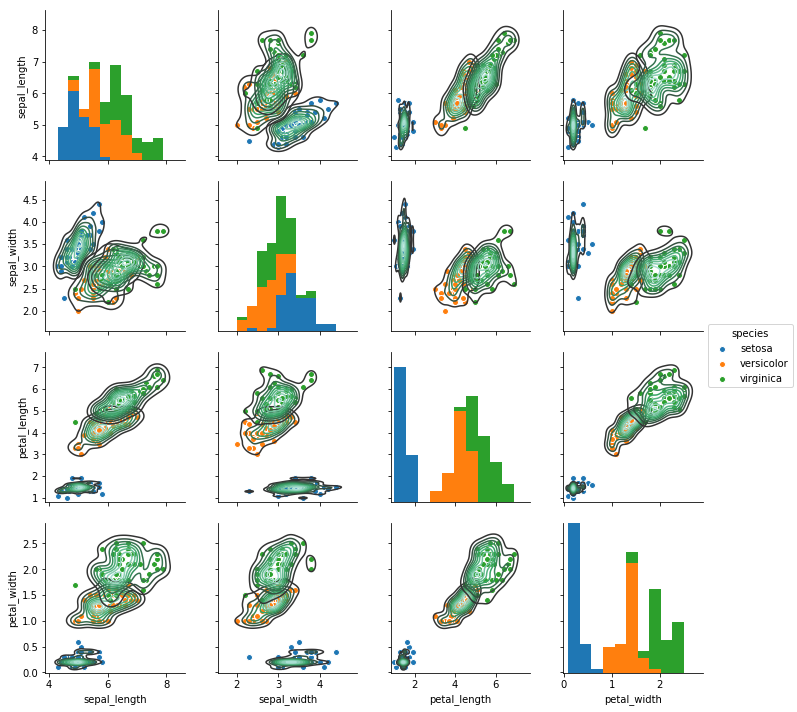

In [108]:
g = sns.pairplot(iris, hue="species")
g.map_offdiag(sns.kdeplot, lw=1);

As you can see: the iris data feature 3 classes in a four dimentional data set. We will now prepare this data for visualization in ParaView.

**Problem 5b**

Select 3 of the variables to serve as the (x, y, z) spatial coordinates for the data set. Note - the specific selection does not particularly matter, though 2 features are clearly better than the others.

In [110]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [111]:
x = iris.sepal_length

y = iris.petal_length
z = iris.petal_width

**Problem 5c** 

Export the iris data as a vtk file for ParaView. Include both the species *and* the four features as data for the vtk file. Finally, be sure to randomize the order of the data prior to writing the vtk file.

*Hint 1* - convert the species to a numerical representation.

*Hint 2* - you may find [`np.random.choice`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) helpful.

In [133]:
species = iris.species


petal_width = iris.petal_width
petal_length = iris.petal_length
sepal_width = iris.sepal_width
sepal_length = iris.sepal_length

dx = np.arange(len(petal_width))
indx = np.random.choice(dx, 25)
pw = np.array(petal_width[indx])
pl = np.array(petal_length[indx])
sw = np.array(sepal_width[indx])
sl = np.array(sepal_length[indx])
spec = np.array(species[indx])



array([ 6.4,  5.4,  4.5,  5.8,  5.7,  4.9,  6.7,  6.4,  4.5,  5.6,  6.2,
        6. ,  5.9,  4.9,  5.4,  7.2,  4.5,  6.8,  4.8,  5.4,  6.2,  5.8,
        6.7,  6. ,  5. ])

In [134]:
pointsToVTK("./iris", pw, pl, sw, sl,  pointData = {"species" : spec})

TypeError: pointsToVTK() got an unexpected keyword argument 'pointData'

**Problem 5d**

Open the iris data in ParaView. Represent the points as point gaussians, and color the points based on their species.

Rotating the data on the screen - it is possible to get a better sense of the distance between versicolor and virginica classes. 

Now we will attempt to cluster the data.

**Problem 5e**

Create a K means statistical filter for the data. [*Filters $\rightarrow$ Statistics $\rightarrow$ K means*]

Remove species from the variable of interest (we don't want to cluster on the correct answer). Increase the training fraction to 0.5, and reduce the tolerance to 0. Then select *Apply*.

Turn on the rendering of the Assessed Data (and turn off iris.vtu). Now color the data via ClosestId(0). 

How do your clusters compare to the correct answer? Can you improve on this initial attempt at clustering?

**Solution to 5e**

The clusters in this case look a little ridiculous. That is because we fixed $k = 5$. If we instead fit for 3 clusters, we find clusters that better resemble the true classifications, however there are still a number of misidentifications.

**Break Out Problem**

Which visualization technique is to be preferred: `seaborn` or ParaView? 

[*spend a few minutes discussing with your neighbor*]

**Problem 5f**

Click the *+* symbol next to Layout #1. Select *Plot Matrix View*. Be sure that all 5 data values are selected, then click *Apply*. 

Now which method do you prefer?

## Problem 6) Rendering Basic Astronomical Data

If you have not already, download the files Density.vtk and Temperature.vtk from the [data repo](https://northwestern.box.com/s/6pzxkp11l9ffn33kahlvu8y9tf8tp0li). These data were generated as part of a cosmological simulation run by Pascal Paschos at Northwestern University.

Note, you'll need to unpack the tarball

    tar -zxvf pv_vtk.tar.gz

**Problem 6a**

Open the Density.vtk and Temperature.vtk files in ParaView.

Select the "eye" next to Density to render the density information.

**Problem 6b**

Change the representation to Volume. The structure in this data is more complicated than our previous examples, take a moment to explore the contents of the data cube.

**Problem 6c**

Turn off the Density render, and turn on the Temperature render. Again, change the represenation to Volume. 

How does the density data compare to the temperature data?

**Problem 6d**

Change the colorbar for the Temperature. 

In the properties tab, under the Coloring header, select the choose presets folder (this is the folder with heart over it). 

Using your previous knowledge of visualization, select a terrible colorbar.

Replace the terrible colorbar with a useful colorbar.

**Problem 6e**

Change the colorbar for the Density data.

**Problem 6f**

Render both the Temperature and Density data. 

Can you see both volume renditions? If not, adjust the color schemes for each until you can.



## Problem 7) Slicing the Data Cube

**Problem 7a**

Select the density data. Then slice the data using the tool in the top bar. When happy with the slice that you have selected, click "apply".

*Note* - you can adjust the position of the slice by dragging the outline, and you can adjust the angle of the slice with the arrow.

**Problem 7b**

Hide the density and temperature data, and examine the slice. If you are unhappy with your previous selection, adjust it.

**Problem 7c**

Add a contour to the slice. This can be done using the contour button (multiple concentric half-spheres).

Set the range for the contours from -2 to 2.5, and choose 6 steps for the contours. If you need to, adjust the color of the contours so they are visible relative to the background colors.

**Problem 7d**

Add a clip to the temperature data. This can be done using the clip button (between the slice and contour buttons).

Adjust the position of the clip to match that of the density contour.

*Note* - you may need to slide the position of the clip slightly so that the contours remain visible.

**Problem 7e**

Rotate the slice + clip to an angle of your choosing. Then save your rendering of the data to a png file.

**Warning** - in some instances on my machine this lead to ParaView crashing, be sure you have everything set up as you would like prior to exporting to png.

Finally, in closing, I will note that it is possible in ParaView to export your rendering to `x3dom`, which is a format accepted by AAS journals to include interactive 3d plots in publications.

## Challenge Problem

Convert the data that your brought with you to the DSFP into a ParaView readable vtk format. 